In this notebook, we perform feature importance using SHAP Tree Explainer on all 3 data subsets: training, time-split and external.

We will use the Descriptor model in this analysis.

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier

from lyso_project import descriptor_maker, preprocess_cp_dataset, utils

In [2]:
#import training set

In [ ]:
df_train = pd.read_parquet("/path/to/training_set.parquet")
df_train.info()
df_train.head()
# replace "/path/to/" with proper path

In [4]:
#import time split set

In [ ]:
df_time = pd.read_parquet("/path/to/timesplit_set.parquet")
df_time.info()
df_time.head()
# replace "/path/to/" with proper path

In [6]:
#import external test set

In [ ]:
df_external = pd.read_parquet("/path/to/external_set.parquet")
df_external.info()
df_external.head()
# replace "/path/to/" with proper path

In [8]:
#Generating descriptors

In [9]:
#reading custom rdkit descsriptors
custom_descriptors = []

with open("understandable_descriptors.txt") as reader:
    for line in reader:
        line = line.rstrip()
        custom_descriptors.append(line)

print(len(custom_descriptors))

107

In [10]:
train_rdkit_descriptors = descriptor_maker.rdkit_descriptor_calculator(df_train, 
                                                                      add_logP=True, 
                                                                      add_bpKa1=True, 
                                                                      add_bpKa2=True, 
                                                                      custom_descriptor_list = custom_descriptors)

time_rdkit_descriptors = descriptor_maker.rdkit_descriptor_calculator(df_time, 
                                                                      add_logP=True, 
                                                                      add_bpKa1=True, 
                                                                      add_bpKa2=True, 
                                                                      custom_descriptor_list = custom_descriptors)

external_rdkit_descriptors = descriptor_maker.rdkit_descriptor_calculator(df_external, 
                                                                      add_logP=True, 
                                                                      add_bpKa1=True, 
                                                                      add_bpKa2=True, 
                                                                      custom_descriptor_list = custom_descriptors)

In [11]:
train_rdkit_descriptors.info()
train_rdkit_descriptors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Columns: 110 entries, NumValenceElectrons to bpKa2
dtypes: float64(6), int64(104)
memory usage: 1.7 MB


,NumValenceElectrons,NumRadicalElectrons,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,logP,bpKa1,bpKa2
0,152,0,1,1,2,1,2,3,4,1,...,0,0,0,0,0,1,0,4.42,9.46,7.08
1,152,0,1,1,2,1,1,2,3,1,...,0,0,0,0,1,1,0,5.97,9.42,7.02
2,160,0,2,2,4,3,1,4,3,1,...,0,0,0,0,0,0,0,4.55,8.06,-5.00
3,146,0,1,1,2,1,1,2,3,1,...,0,0,0,0,1,1,0,5.45,9.42,7.02
4,154,0,1,1,2,1,1,2,4,1,...,0,0,0,0,1,1,0,5.44,9.42,7.02


In [12]:
time_rdkit_descriptors.info()
time_rdkit_descriptors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Columns: 110 entries, NumValenceElectrons to bpKa2
dtypes: float64(6), int64(104)
memory usage: 134.2 KB


,NumValenceElectrons,NumRadicalElectrons,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,logP,bpKa1,bpKa2
0,132,0,0,1,1,1,1,2,4,4,...,0,0,0,0,1,0,1,3.03,9.52,-0.27
1,210,0,1,2,3,1,1,2,7,0,...,0,0,0,0,0,1,0,5.60,9.86,9.06
2,198,0,0,2,2,2,2,4,6,2,...,0,0,0,0,0,1,0,3.55,10.07,6.53
3,192,0,0,1,1,1,1,2,8,3,...,0,0,0,0,1,0,0,5.25,9.04,5.44
4,192,0,0,2,2,2,2,4,6,2,...,0,0,0,0,0,1,0,3.87,10.07,6.53


In [ ]:
external_rdkit_descriptors.info()
external_rdkit_descriptors.head()

In [14]:
#load Descriptor model

In [15]:
model_rdkit = XGBClassifier()
rdkit_model_path = "/path/to/Select_RDKit_desc_with_logP_bpKa1_unscaled_model.json"
# replace "/path/to/" with proper path

model_rdkit.load_model(rdkit_model_path)
model_rdkit

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss',
              feature_types=['int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'float', 'float', 'float', 'int', 'int',
                             'int', 'int', 'int...
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=16, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [16]:
#Make SHAP explainers

In [17]:
explainer = shap.TreeExplainer(model_rdkit)

shap_values_train = explainer.shap_values(train_rdkit_descriptors)
shap_values_time = explainer.shap_values(time_rdkit_descriptors)
shap_values_external = explainer.shap_values(external_rdkit_descriptors)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [18]:
#training data's feature importance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


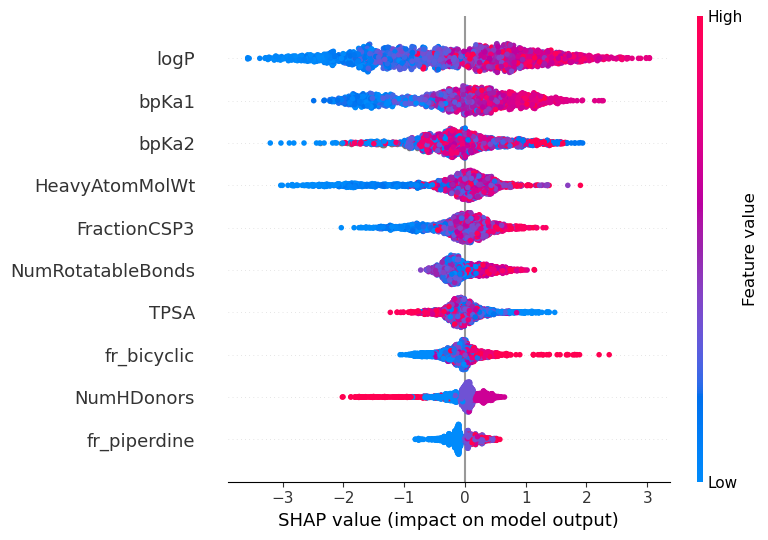

In [19]:
shap.summary_plot(shap_values_train, train_rdkit_descriptors, max_display= 10)

In [20]:
#time split data's feature importance

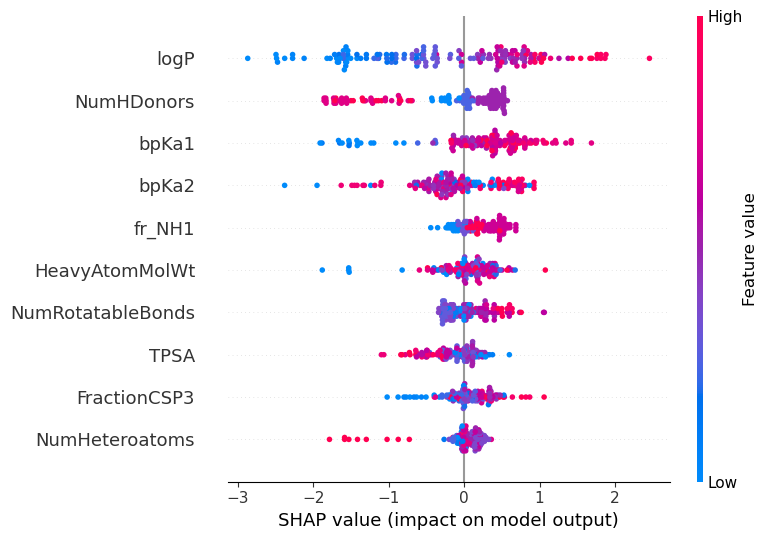

In [21]:
shap.summary_plot(shap_values_time, time_rdkit_descriptors, max_display= 10)

In [22]:
#external data's feature importance

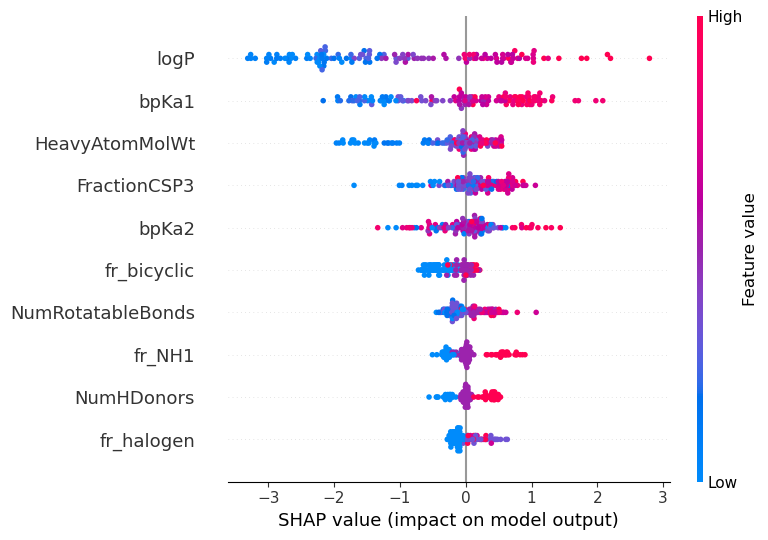

In [23]:
shap.summary_plot(shap_values_external, external_rdkit_descriptors, max_display= 10)

In [24]:
#save all the plots

In [25]:
shap.summary_plot(shap_values_train, train_rdkit_descriptors, max_display= 10, show = False)
plt.savefig("top10_descriptors_training_set.png", dpi = 1000, bbox_inches = "tight")
plt.close()

In [26]:
shap.summary_plot(shap_values_time, time_rdkit_descriptors, max_display= 10, show = False)
plt.savefig("top10_descriptors_2023_set.png", dpi = 1000, bbox_inches = "tight")
plt.close()

In [27]:
shap.summary_plot(shap_values_external, external_rdkit_descriptors, max_display= 10, show = False)
plt.savefig("top10_descriptors_external_set.png", dpi = 1000, bbox_inches = "tight")
plt.close()